In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
data = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
noc.head()

In [ ]:
noc.info()

In [ ]:
data.loc[:,'Medal'].head()

In [3]:
print(data.groupby(['NOC']).Medal.count().sort_values(ascending=False))

NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
HUN    1135
NED    1040
NOR    1033
GDR    1005
CHN     989
JPN     913
FIN     900
SUI     691
ROU     653
KOR     638
DEN     597
FRG     586
POL     565
ESP     489
TCH     488
BRA     475
BEL     468
AUT     450
CUB     409
YUG     390
       ... 
MYA       0
NBO       0
NCA       0
NFL       0
RHO       0
IVB       0
TLS       0
RWA       0
TKM       0
DMA       0
ESA       0
SWZ       0
STP       0
SSD       0
FSM       0
GAM       0
OMA       0
SOM       0
SOL       0
GEQ       0
SMR       0
SLE       0
SKN       0
GUI       0
GUM       0
HON       0
SEY       0
SAM       0
SAA       0
GBS       0
Name: Medal, Length: 230, dtype: int64


In [4]:
print(data.groupby(['Team','Medal']).Medal.count().sort_values(ascending = False))

Team           Medal 
United States  Gold      2474
               Silver    1512
               Bronze    1233
Soviet Union   Gold      1058
               Silver     716
Germany        Gold       679
               Bronze     678
Soviet Union   Bronze     677
Germany        Silver     627
Great Britain  Silver     582
France         Bronze     577
Great Britain  Bronze     572
Italy          Gold       535
Great Britain  Gold       519
France         Silver     518
Australia      Bronze     511
Italy          Silver     508
Sweden         Bronze     507
Italy          Bronze     484
Sweden         Silver     476
France         Gold       455
Australia      Silver     453
Sweden         Gold       451
Hungary        Gold       432
Canada         Gold       422
Finland        Bronze     415
Canada         Silver     413
               Bronze     408
Russia         Bronze     393
Netherlands    Bronze     390
                         ... 
Cameroon       Bronze       1
Sudan          Sil

In [5]:
men = data.loc[data['Sex'] == 'M',:]
women = data.loc[data['Sex'] == 'F',:]

In [6]:
print(men.groupby('Medal').Event.count())
print(women.groupby('Medal').Event.count())

Medal
Bronze    9524
Gold      9625
Silver    9381
Name: Event, dtype: int64
Medal
Bronze    3771
Gold      3747
Silver    3735
Name: Event, dtype: int64


In [7]:
g1 = men.groupby('Year').Medal.count()
g2 = women.groupby('Year').Medal.count()

Year
1896     143
1900     591
1904     476
1906     452
1908     815
1912     911
1920    1264
1924     910
1928     720
1932     671
1936     928
1948     871
1952     875
1956     872
1960     863
1964     969
1968     995
1972    1119
1976    1091
1980    1117
1984    1150
1988    1228
1992    1339
1994     223
1996    1078
1998     251
2000    1124
2002     270
2004    1103
2006     295
2008    1116
2010     291
2012    1023
2014     332
2016    1054
Name: Medal, dtype: int64


Text(0.5,1,'Medals Awarded per Olympics per Gender')

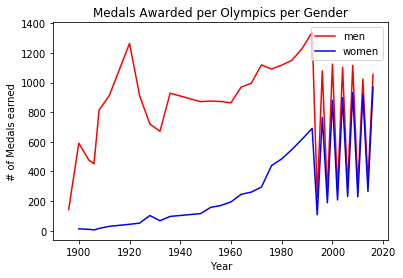

In [8]:
plt.plot(g1, color='red')
plt.plot(g2, color = 'blue')
plt.legend(loc = 'upper right', labels = ('men', 'women'))
plt.xlabel('Year')
plt.ylabel('# of Medals per year')
plt.title('Medals Awarded per Olympics per Gender')

In [9]:
data[data['Year'] == 1998].Season.head(1)

68    Winter
Name: Season, dtype: object

We see that years for winter olympics after 1994 (when the olympics split to winter/summer) have significantly lower medal counts.

In [10]:
data[data['Year'] >= 1994].groupby('Season')[['Event','Medal']].count()

,Event,Medal
Season,,
Summer,81254,11859
Winter,24549,2892


In [11]:
tb = data.groupby('Event').Medal.count().sort_values(ascending = False)
print(tb.head(10))
print(tb.tail(10))

Event
Football Men's Football             1269
Ice Hockey Men's Ice Hockey         1230
Hockey Men's Hockey                 1050
Water Polo Men's Water Polo          866
Rowing Men's Coxed Eights            730
Gymnastics Men's Team All-Around     713
Basketball Men's Basketball          687
Handball Men's Handball              588
Volleyball Men's Volleyball          495
Hockey Women's Hockey                478
Name: Medal, dtype: int64
Event
Motorboating Mixed A-Class (Open)                     1
Shooting Men's Unknown Event                          0
Archery Men's Unknown Event                           0
Art Competitions Mixed Architecture, Unknown Event    0
Art Competitions Mixed Literature, Unknown Event      0
Art Competitions Mixed Music, Unknown Event           0
Art Competitions Mixed Sculpturing, Unknown Event     0
Art Competitions Mixed Unknown Event                  0
Sailing Mixed 18 foot                                 0
Art Competitions Mixed Painting, Unknown Event  

In [ ]:
tb[tb <= 3]

In [21]:
print(data[data['Year'] >= 1994].Event.nunique())
print(data[data['Year'] >= 1994].Name.nunique())
print(data[data['Year'] >= 1994].ID.nunique())

456
53957
54201


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


,,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Name,ID,,,,,,,,,,,,,
"Gabrielle Marie ""Gabby"" Adcock (White-)",869,1,1,1,0,1,1,1,1,1,1,1,1,0
Eleonora Margarida Josephina Scmitt,107953,2,2,0,0,2,2,2,2,2,2,2,2,0
Jean Hauptmanns,46661,1,1,0,0,1,1,1,1,1,1,1,1,0
Luis ngel Fernando de los Santos Grossi,26388,5,5,0,0,5,5,5,5,5,5,5,5,0
Th Anh,29842,1,1,1,1,1,1,1,1,1,1,1,1,0
Th Ngn Thng,29843,7,7,7,7,7,7,7,7,7,7,7,7,0
Tin Tun,29844,1,1,1,1,1,1,1,1,1,1,1,1,0
A Dijiang,1,1,1,1,1,1,1,1,1,1,1,1,1,0
A Lamusi,2,1,1,1,1,1,1,1,1,1,1,1,1,0


In [ ]:
plt.scatter(data['Year'], data['Age'])
plt.show()

In [ ]:
data[data['Age'] > 45][data['Year'] > 1994]

In [ ]:
plt.scatter(data[data['Year'] > 1994].Year, data[data['Year'] > 1994].Age)
plt.show()

In [ ]:
print(data.groupby('Event').Age.mean())
print(data.groupby('Event').Age.median())

In [ ]:
age = data.groupby('Event').Age

In [ ]:
data.groupby('Name').Medal.count().sort_values(ascending=False)

In [ ]:
print(age.mean().head(15))
print(age.median().head(15))
print(age.var().head(15))

In [25]:
subset = data[data['Year'] >= 1994]
subset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
15,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN


In [153]:
subset.groupby(['Name', 'ID'])

In [39]:
d = subset.groupby('NOC').Event.nunique().sort_values(ascending=False)

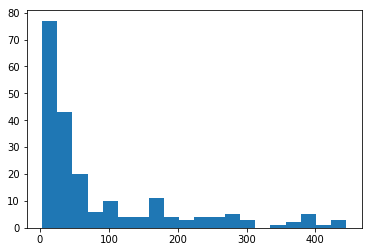

In [45]:
plt.hist(d, bins=20)
plt.show()

It is very apparent that modern first world countries tend to participate in significantly more events than most other countries.

Try looking at how women's role in the olympics improved over time

In [79]:
p1 = women.groupby('Year').Name.nunique()
p1 = pd.DataFrame(p1)
p2 = data.groupby('Year').Name.nunique()
p2 = pd.DataFrame(p2)

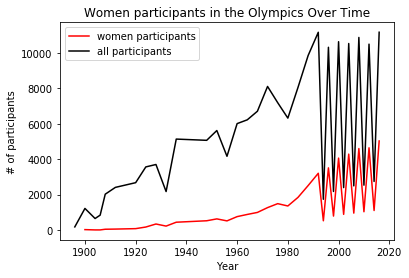

In [103]:
plt.plot(p1, color = 'red')
plt.plot(p2, color = 'black')
plt.legend(loc = 'upper left', labels = ('women participants', 'all participants'))
plt.xlabel('Year')
plt.ylabel('# of participants')
plt.title('Women participants in the Olympics Over Time')
plt.show()


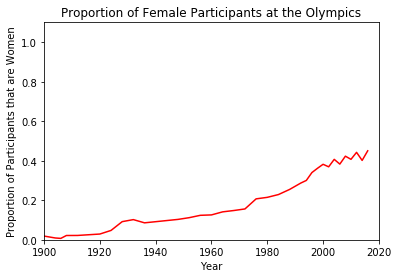

In [211]:
p = p1/p2
plt.plot(p, color = 'red')
plt.axis((1900, 2020, 0, 1.1))
plt.xlabel('Year')
plt.ylabel('Proportion of Participants that are Women')
plt.title('Proportion of Female Participants at the Olympics')
plt.show()

parts = women.groupby(['Year', 'NOC']).Name.nunique()
parts = pd.DataFrame(parts)
parts.unstack(1).fillna(0).apply(sum, 0).sort_values(ascending=False)

In [206]:
parts = women.groupby(['Year', 'NOC']).Name.nunique()
parts = pd.DataFrame(parts)
parts = parts/p1
parts = parts.unstack(1)

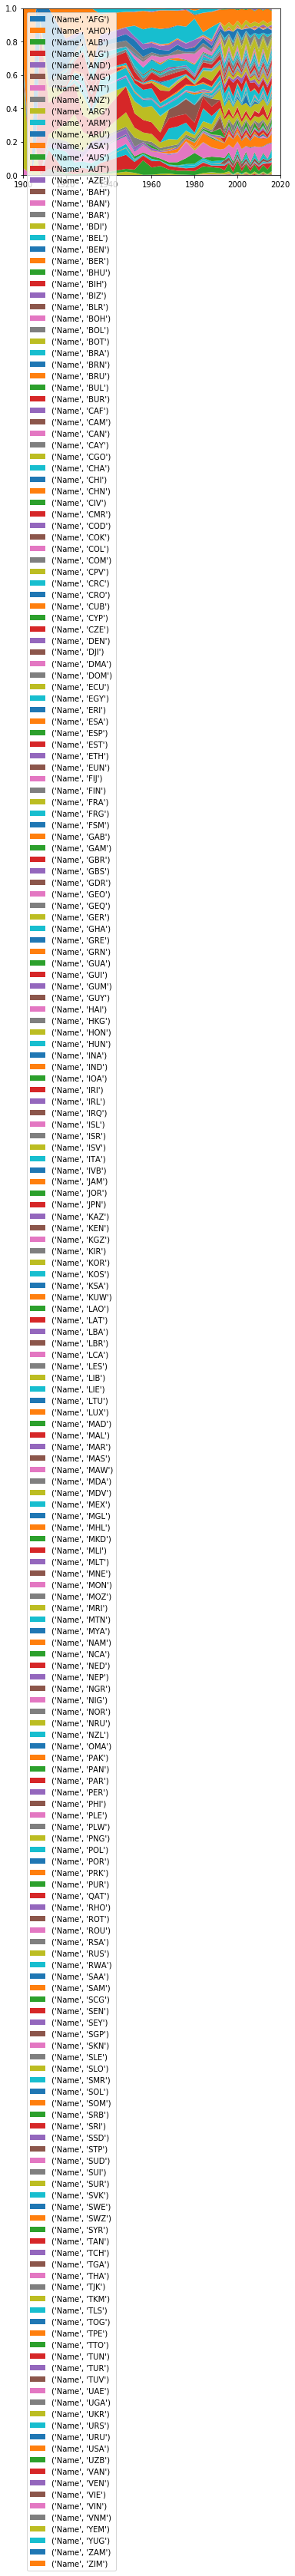

In [208]:
plt.stackplot(parts.index, np.transpose(parts.fillna(0)), baseline = 'zero')
plt.axis((1900, 2020, 0, 1))
plt.legend(loc='upper left', labels = parts.columns)
p

too hard to use the above graph

In [218]:
data[data['Season'] == 'Winter'][data['Sport'] == 'Figure Skating'].Event.unique()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


array(["Figure Skating Men's Singles", 'Figure Skating Mixed Team',
       'Figure Skating Mixed Pairs', "Figure Skating Women's Singles",
       'Figure Skating Mixed Ice Dancing'], dtype=object)

In [248]:
mfs = data[data['Event'] == "Figure Skating Men's Singles"]
print(mfs.shape)
ffs = data[data['Event'] == "Figure Skating Women's Singles"]
print(ffs.shape)

(506, 15)
(555, 15)


In [269]:
print("mean men:", mfs.Age.mean(),
      "\n median men:", mfs.Age.median(),
      "\n oldest:", mfs.Age.max(),
      "\n youngest:", mfs.Age.min(),
      "\n")
print("mean women:", ffs.Age.mean(),
      "\n median women:", ffs.Age.median(), 
      "\n oldest:", ffs.Age.max(),
      "\n youngest:", ffs.Age.min())

mean men: 22.305220883534137 
 median men: 22.0 
 oldest: 46.0 
 youngest: 12.0 

mean women: 19.414545454545454 
 median women: 19.0 
 oldest: 38.0 
 youngest: 11.0


In [304]:
# print(mfs.groupby('Name').Year.unique().head())
print(mfs.groupby('Name').Year.nunique().sort_values(ascending=False).head(10))
print(mfs.groupby('Name').Year.nunique().value_counts())

Name
Jan Hoffmann                  4
Gillis Emanuel Grafstrm       4
Elvis Stojko                  4
Brian Joubert                 4
David Liu                     3
Nathaniel William Niles       3
Jung Sung-Il                  3
Karl Martin Alois Schfer      3
Karol Emil Divn (Finster-)    3
Todd James Eldredge           3
Name: Year, dtype: int64
1    218
2     94
3     28
4      4
Name: Year, dtype: int64


In [305]:
# print(ffs.groupby('Name').Year.unique().head())
print(ffs.groupby('Name').Year.nunique().sort_values(ascending=False).head(10))
print(ffs.groupby('Name').Year.nunique().value_counts())

Name
Sonja Henie (-Topping, -Gardiner, -Onstad)    4
Jlia Sebestyn                                 4
Olena Anatolivna Liashenko                    4
Laetitia Hubert                               4
Maribel Yerxa Vinson (-Owen)                  3
Katarina Witt                                 3
Sjoukje Rosalinde Dijkstra (-Kossmayer)       3
Sarah Meier                                   3
Chen Lu                                       3
Surya (Claudine-) Bonaly                      3
Name: Year, dtype: int64
1    311
2     90
3     16
4      4
Name: Year, dtype: int64


In [309]:
ffs.groupby('Medal').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
993,559,Tsvetelina Abrasheva,F,16.0,NaN,NaN,Bulgaria,BUL,1994 Winter,1994,Winter,Lillehammer,Figure Skating,Figure Skating Women's Singles,NaN
1454,810,Bridget Shirley Adams (-Bengough),F,19.0,NaN,NaN,Great Britain,GBR,1948 Winter,1948,Winter,Sankt Moritz,Figure Skating,Figure Skating Women's Singles,NaN
4156,2386,"Tenley Emma Albright (-Gardiner, -Blakely)",F,16.0,NaN,NaN,United States,USA,1952 Winter,1952,Winter,Oslo,Figure Skating,Figure Skating Women's Singles,Silver
4157,2386,"Tenley Emma Albright (-Gardiner, -Blakely)",F,20.0,NaN,NaN,United States,USA,1956 Winter,1956,Winter,Cortina d'Ampezzo,Figure Skating,Figure Skating Women's Singles,Gold
5010,2856,Lisa-Marie Allen,F,19.0,NaN,NaN,United States,USA,1980 Winter,1980,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,NaN
5063,2884,Patricia Kim Alletson,F,17.0,NaN,NaN,Canada,CAN,1976 Winter,1976,Winter,Innsbruck,Figure Skating,Figure Skating Women's Singles,NaN
5224,2962,Zsuzsa Almssy,F,13.0,158.0,60.0,Hungary,HUN,1964 Winter,1964,Winter,Innsbruck,Figure Skating,Figure Skating Women's Singles,NaN
5514,3118,Jeannette Eleanor Altwegg (-Wirz),F,17.0,NaN,NaN,Great Britain,GBR,1948 Winter,1948,Winter,Sankt Moritz,Figure Skating,Figure Skating Women's Singles,Bronze
5515,3118,Jeannette Eleanor Altwegg (-Wirz),F,21.0,NaN,NaN,Great Britain,GBR,1952 Winter,1952,Winter,Oslo,Figure Skating,Figure Skating Women's Singles,Gold
8730,4799,Shizuka Arakawa,F,24.0,164.0,50.0,Japan,JPN,2006 Winter,2006,Winter,Torino,Figure Skating,Figure Skating Women's Singles,Gold
